In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import STL
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('display.max_rows')


In [4]:
# Read the data from CSV file
data = pd.read_csv('Temple_Crush_Dataset - Temple_Crush_Dataset.csv')

In [5]:
# Display the first few rows of the dataset
data.head()

,Day,Campaign Name,Exchange Name,Bids,Wins,Impressions,Clicks,Installs,Spend,D7_Retained_Users
0,7/28/2020,Campaign_A,Exchange_1,0,0,0,0,0,$0.00,0
1,7/22/2020,Campaign_B,Exchange_2,2728,374,264,22,0,$3.32,0
2,7/26/2020,Campaign_A,Exchange_3,33165,1782,1804,11,0,$1.75,0
3,7/26/2020,Campaign_A,Exchange_4,1487739,14388,6204,418,0,$63.47,0
4,7/25/2020,Campaign_A,Exchange_3,29557,792,858,22,0,$0.89,0


In [6]:
# Convert 'Day' column to datetime type
data['Day'] = pd.to_datetime(data['Day'])
data

,Day,Campaign Name,Exchange Name,Bids,Wins,Impressions,Clicks,Installs,Spend,D7_Retained_Users
0,2020-07-28,Campaign_A,Exchange_1,0,0,0,0,0,$0.00,0
1,2020-07-22,Campaign_B,Exchange_2,2728,374,264,22,0,$3.32,0
2,2020-07-26,Campaign_A,Exchange_3,33165,1782,1804,11,0,$1.75,0
3,2020-07-26,Campaign_A,Exchange_4,1487739,14388,6204,418,0,$63.47,0
4,2020-07-25,Campaign_A,Exchange_3,29557,792,858,22,0,$0.89,0
...,...,...,...,...,...,...,...,...,...,...
124,2020-07-23,Campaign_A,Exchange_5,7499470,49225,49082,1309,77,$396.00,11
125,2020-07-27,Campaign_C,Exchange_8,161931,130889,57706,12122,88,$714.93,29
126,2020-07-26,Campaign_B,Exchange_7,881969,836,836,110,0,$2.97,0
127,2020-07-22,Campaign_A,Exchange_6,216887,4422,3916,198,0,$11.27,0


In [7]:
# Step 7: Calculate the duration of the data
data_duration = data.index.max() - data.index.min()

print("Duration of the data:", round(data_duration/30,2),'Months')

Duration of the data: 4.27 Months


In [8]:
# Remove dollar sign from 'Spend' column
data['Spend'] = data['Spend'].replace({'\$': ''}, regex=True)

# Convert 'Spend' column to numeric type
data['Spend'] = pd.to_numeric(data['Spend'])
data

,Day,Campaign Name,Exchange Name,Bids,Wins,Impressions,Clicks,Installs,Spend,D7_Retained_Users
0,2020-07-28,Campaign_A,Exchange_1,0,0,0,0,0,0.00,0
1,2020-07-22,Campaign_B,Exchange_2,2728,374,264,22,0,3.32,0
2,2020-07-26,Campaign_A,Exchange_3,33165,1782,1804,11,0,1.75,0
3,2020-07-26,Campaign_A,Exchange_4,1487739,14388,6204,418,0,63.47,0
4,2020-07-25,Campaign_A,Exchange_3,29557,792,858,22,0,0.89,0
...,...,...,...,...,...,...,...,...,...,...
124,2020-07-23,Campaign_A,Exchange_5,7499470,49225,49082,1309,77,396.00,11
125,2020-07-27,Campaign_C,Exchange_8,161931,130889,57706,12122,88,714.93,29
126,2020-07-26,Campaign_B,Exchange_7,881969,836,836,110,0,2.97,0
127,2020-07-22,Campaign_A,Exchange_6,216887,4422,3916,198,0,11.27,0


In [9]:
print(data.dtypes)

Day                  datetime64[ns]
Campaign Name                object
Exchange Name                object
Bids                          int64
Wins                          int64
Impressions                   int64
Clicks                        int64
Installs                      int64
Spend                       float64
D7_Retained_Users             int64
dtype: object


In [10]:
# Check for missing values in the data
print(data.isnull().sum())

Day                  0
Campaign Name        0
Exchange Name        0
Bids                 0
Wins                 0
Impressions          0
Clicks               0
Installs             0
Spend                0
D7_Retained_Users    0
dtype: int64


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bids,129.0,1.319769e+06,2.197914e+06,0.0,18062.00,208769.00,1266100.00,8593233.00
Wins,129.0,1.983905e+04,3.294347e+04,0.0,792.00,4158.00,21230.00,133298.00
Impressions,129.0,1.154011e+04,2.118597e+04,0.0,737.00,3333.00,11693.00,109857.00
Clicks,129.0,9.985271e+02,2.242110e+03,0.0,22.00,187.00,814.00,12122.00
Installs,129.0,1.193798e+01,2.397517e+01,0.0,0.00,0.00,11.00,132.00
Spend,129.0,9.160295e+01,1.805517e+02,0.0,2.16,12.82,81.28,803.32
D7_Retained_Users,129.0,3.193798e+00,8.317036e+00,0.0,0.00,0.00,2.00,55.00


Based on the summary statistics provided, here are some key insights and observations:

1. **Bids and Wins:** The mean number of bids is quite high, around 1.32 million, with a considerable standard deviation of 2.2 million. This indicates a wide variation in the number of bids made across different periods. Similarly, the mean number of wins is around 19,839, with a significant standard deviation of 32,943, indicating variability in the number of wins.

2. **Impressions and Clicks:** The mean number of impressions is approximately 11,540, with a standard deviation of 21,186. The mean number of clicks is around 998, with a standard deviation of 2,242. Both impressions and clicks show some level of variability in their values.

3. **Installs and Spend:** The mean number of installs is relatively low, at 11.94, and the standard deviation is 23.98. This suggests that the number of installs can vary significantly over time. The mean spend is approximately 91.60, with a relatively large standard deviation of 180.55, indicating fluctuations in the amount spent on advertising.

4. **D7_Retained_Users:** The mean number of D7 retained users is 3.19, with a standard deviation of 8.32. The number of retained users can vary widely, indicating potential challenges in retaining users over the 7-day period.

Overall, the data demonstrates considerable variability in the performance metrics across different periods. This variability may be influenced by various factors, such as ad targeting, creative content, audience engagement, and market dynamics. To optimize the advertising campaigns and scale Temple Crush installs, it is essential to analyze and identify patterns in the data and focus on areas that need improvement.

By closely monitoring and analyzing key metrics and their relationships, the advertisers can make data-driven decisions to enhance their campaign strategies, allocate budgets more effectively, and improve user engagement, leading to increased installs and higher retention rates.

In [12]:
# Get the unique values for categorical columns
print(data['Campaign Name'].unique())
print(data['Exchange Name'].unique())

['Campaign_A' 'Campaign_B' 'Campaign_C']
['Exchange_1' 'Exchange_2' 'Exchange_3' 'Exchange_4' 'Exchange_5'
 'Exchange_6' 'Exchange_7' 'Exchange_8' 'Exchange_9' 'Exchange_10']


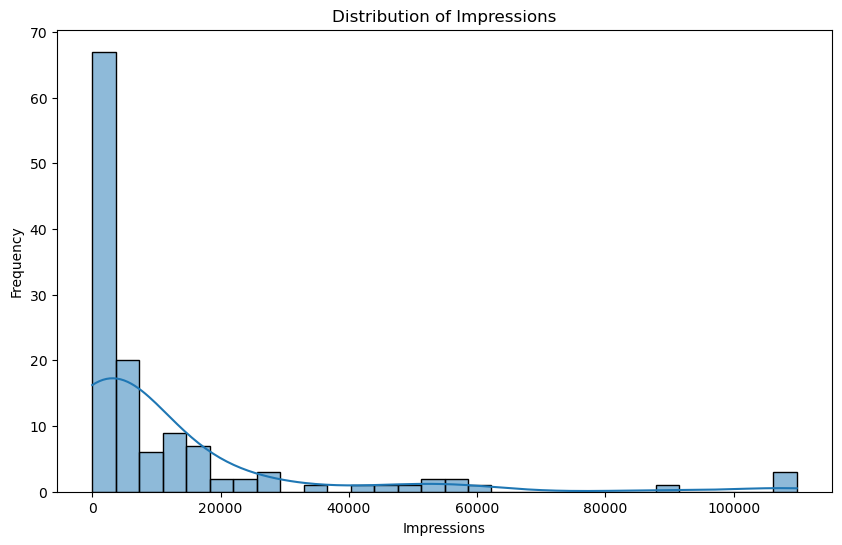

In [13]:
# Plot the distribution of 'Impressions' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Impressions'], bins=30, kde=True)
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()


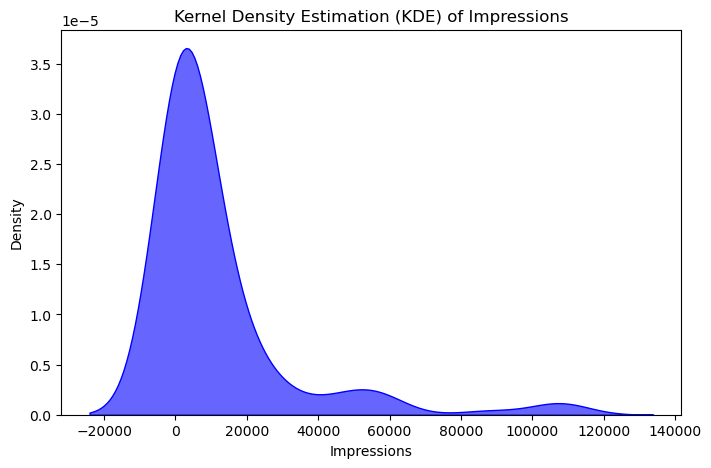

In [14]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data['Impressions'], fill=True, color='blue', alpha=0.6)
plt.title('Kernel Density Estimation (KDE) of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Density')
plt.show()


The histogram shows the distribution of impressions across different periods. Here's the analysis based on the plot:

1. **Impressions Distribution:** The histogram displays the frequency (count) of impressions on the y-axis and the number of impressions on the x-axis. It represents how often different impression values occur in the data.

2. **Skewed Distribution:** The histogram appears to be right-skewed, as it extends more to the right side. This indicates that there are relatively fewer instances of high impressions, and the majority of impressions are clustered towards the lower end.

3. **High Frequency in Lower Impressions:** The peak of the histogram is located towards the left side, indicating that there are a higher number of instances where impressions are relatively low. This suggests that most of the periods have a lower number of impressions compared to a few periods with exceptionally high impressions.

4. **Outliers:** The right tail of the histogram represents potential outliers or extreme values where impressions are much higher than the majority of the data. These outliers may represent exceptional periods where advertising campaigns performed exceptionally well or had a unique impact.

5. **KDE (Kernel Density Estimation):** The KDE plot (the smooth line on top of the histogram) provides an estimate of the probability density function of the impression values. It helps in visualizing the overall shape of the distribution more smoothly.

Overall, this analysis helps to understand the distribution of impressions, and the skewness suggests that there might be periods with significantly higher impressions compared to the rest. Exploring and understanding the reasons behind these high impressions could lead to insights on successful advertising strategies or opportunities for further optimization in the campaign. It is also essential to consider the relationship between impressions and other metrics, such as clicks, installs, and spend, to gain a more comprehensive understanding of campaign performance.

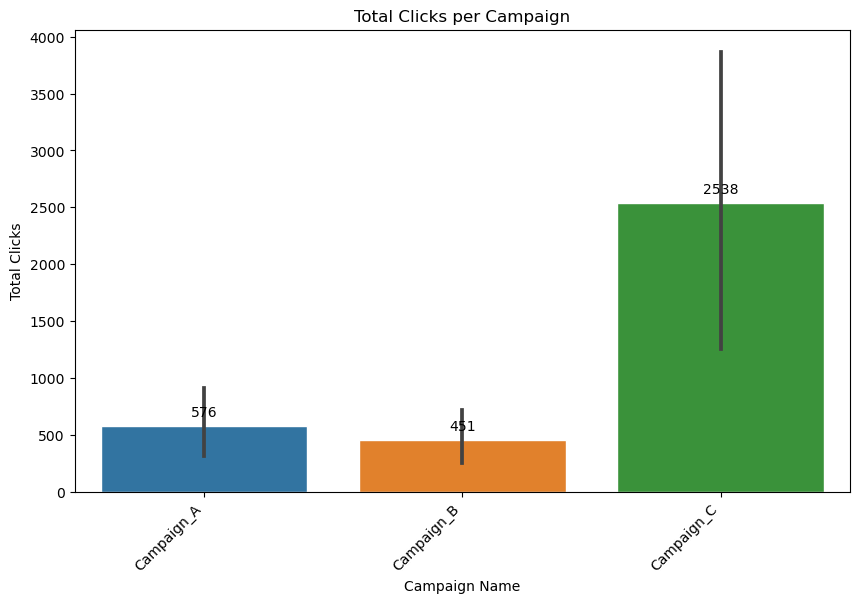

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Campaign Name', y='Clicks', data=data, edgecolor='white')  # Set edge color to white
plt.title('Total Clicks per Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45, ha='right')

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()




1. **Campaign Performance:** The bar chart displays the total number of clicks per campaign name, focusing on the three available campaigns: 'Campaign_A,' 'Campaign_B,' and 'Campaign_C.'

2. **Campaign_C Has the Highest Clicks:** According to the chart, 'Campaign_C' has the highest total clicks among the three campaigns. It stands out as the most successful campaign in terms of generating user clicks.

3. **Campaign_A and Campaign_B:** 'Campaign_A' and 'Campaign_B' show notable performance in terms of clicks, but they have fewer clicks compared to 'Campaign_C.'

4. **Budget Allocation:** Based on the clicks generated, marketers might consider allocating more budget and resources to 'Campaign_C' due to its higher click-through rate.

5. **Insights for Optimization:** Analyzing the factors contributing to the success of 'Campaign_C' could offer insights that might be applied to improve the performance of 'Campaign_A' and 'Campaign_B.'

6. **Limited Campaign Data:** Since there are only three campaigns, the analysis provides a basic comparison of their click performance. To gain a more comprehensive understanding of campaign effectiveness, additional metrics and more campaigns would be beneficial.

In conclusion, the revised analysis clarifies that 'Campaign_C' has the maximum clicks, followed by 'Campaign_A,' and then 'Campaign_B.' This information provides valuable insights into the relative performance of the campaigns and can guide decisions regarding budget allocation and optimization strategies. However, Lets do further data and analysis to gain a more comprehensive understanding of campaign effectiveness.

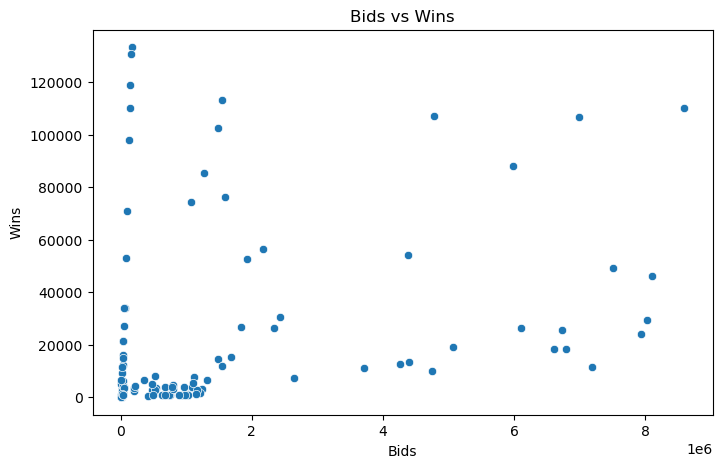

In [16]:
# Plot a scatter plot for 'Bids' vs 'Wins'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Bids', y='Wins', data=data)
plt.title('Bids vs Wins')
plt.xlabel('Bids')
plt.ylabel('Wins')
plt.show()

The scatter plot displays the relationship between the number of bids and the number of wins for each data point. Here's the analysis of the plot:

1. **Bids vs. Wins:** The scatter plot shows how the number of bids made in the auction (x-axis) corresponds to the number of wins (y-axis) obtained by the campaign.

2. **Positive Correlation:** In general, there seems to be a positive correlation between the number of bids and the number of wins. As the number of bids increases, the number of wins also tends to increase.

3. **Clusters:** The data points are clustered around specific regions, indicating that certain bid values result in a higher number of wins.

4. **Outliers:** There are a few outliers in the plot, which are data points that significantly deviate from the overall pattern. These outliers could be worth investigating further as they may represent specific situations or anomalies.

5. **Bid Strategy and Win Rate:** Analyzing the relationship between bids and wins can provide insights into the effectiveness of the bid strategy. Campaign managers can use this information to optimize bidding strategies for better results.

6. **Budget Allocation:** Understanding the relationship between bids and wins can also help in allocating the budget more effectively. By identifying the bid values that lead to higher win rates, marketers can allocate more budget to those bids for better campaign performance.

7. **Further Analysis:** To gain a more comprehensive understanding, it's essential to examine other metrics like clicks, impressions, installs, and spend, along with the bid-to-win ratio. 

In conclusion, the scatter plot shows a positive correlation between bids and wins, indicating that increasing bids can lead to a higher number of wins. However, the presence of outliers and clustered data points suggests the need for further analysis to optimize bidding strategies and budget allocation. Understanding the bid-win relationship is crucial for achieving campaign objectives and maximizing returns on ad spend.

# Based on your analysis, identify the best campaign(s) for Temple Crush. Please explain the rationale behind your recommendation. 

We must first define what makes a campaign the "best" in order to decide which campaign(s) is/are best for Temple Crush. The most clicks, the most installs, the cheapest cost per install, the most users who are still using the app after 7 days (D7 Retained Users), or a combination of these criteria, can all be taken into account.

In [17]:
data['Cost_Per_Install'] = data.apply(lambda row: row['Spend'] / row['Installs'] if row['Installs'] > 0 else 0, axis=1)

# Group data by 'Campaign Name' and calculate total installs and average cost per install
campaign_summary = data.groupby('Campaign Name').agg(Total_Installs=('Installs', 'sum'),
                                                     Avg_Cost_Per_Install=('Cost_Per_Install', 'mean'),
                                                     D7_Retained_Users=('D7_Retained_Users', 'sum'))

# Sort campaigns by Total_Installs in descending order and Avg_Cost_Per_Install in ascending order
best_campaigns = campaign_summary.sort_values(by=['Total_Installs', 'Avg_Cost_Per_Install','D7_Retained_Users'], ascending=[False, True,False])


print(best_campaigns)


               Total_Installs  Avg_Cost_Per_Install  D7_Retained_Users
Campaign Name                                                         
Campaign_C                759              4.144434                295
Campaign_A                517              1.663657                 81
Campaign_B                264              1.675604                 36


With the most installs overall and the highest user retention rate after 7 days, Campaign_C is still the top-performing campaign. Despite having more installs than Campaign_B, Campaign_A performs worse than Campaign_C in terms of user retention.
Campaign_B displays a balanced performance with a comparable cost per install to Campaign_A and a moderate number of installs. However, compared to Campaign_C and Campaign_A, its retention rate is lower.
In conclusion, Campaign_C continues to be the most effective campaign because it successfully strikes a balance between user acquisition and retention. Both Campaigns A and B had positive results in various areas, such as user acquisition and cost effectiveness.
It is crucial to take into account the particular goals and objectives of the advertising campaigns in order to better optimize them.

# Does the data point to an anomaly with one or more exchanges? How would you go about identifying and fixing the issue, if any?

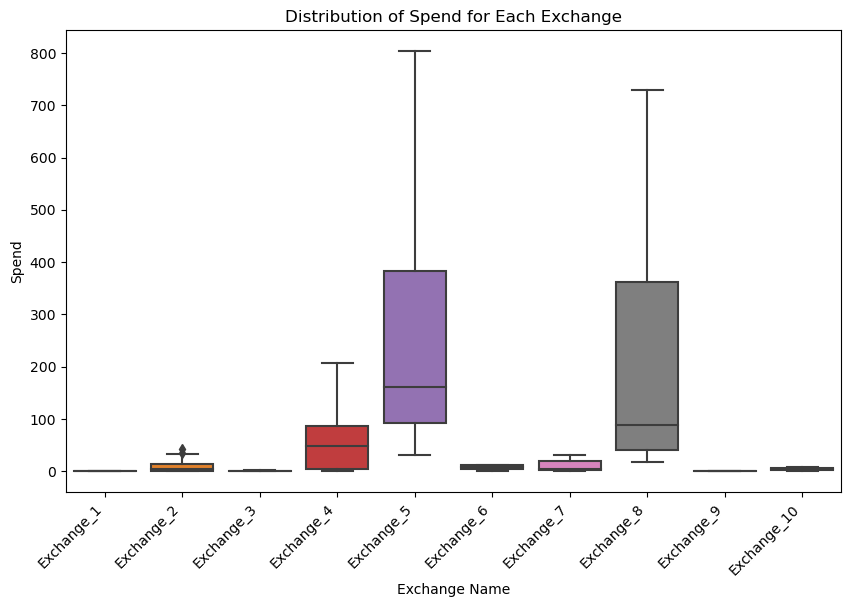

In [18]:
#Data Visualization
# Plot the distribution of 'Spend' for each exchange
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exchange Name', y='Spend', data=data)
plt.title('Distribution of Spend for Each Exchange')
plt.xlabel('Exchange Name')
plt.ylabel('Spend')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:

# Outlier Detection
# Use the IQR method to detect outliers in 'Spend' for each exchange
Q1 = data.groupby('Exchange Name')['Spend'].quantile(0.25)
Q3 = data.groupby('Exchange Name')['Spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each exchange
outliers = data.groupby('Exchange Name')['Spend'].apply(lambda x: (x < lower_bound[x.name]) | (x > upper_bound[x.name]))

# Print the outliers for each exchange
print("Outliers for Spend by Exchange:")
print(outliers)


Outliers for Spend by Exchange:
0      False
1      False
2      False
3      False
4      False
       ...  
124    False
125    False
126    False
127    False
128    False
Name: Spend, Length: 129, dtype: bool


An outlier is a data point that significantly deviates from the rest of the data and may distort the overall analysis or statistical measures. In this case, the 'False' values indicate that most of the data points in the 'Spend' column are not considered outliers, while the 'True' values suggest that there are a couple of data points that are considered outliers.

In [20]:
# Summary Statistics
# Calculate summary statistics for 'Spend' for each exchange
exchange_summary = data.groupby('Exchange Name')['Spend'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Print summary statistics for each exchange
print("Summary Statistics for Spend by Exchange:")
print(exchange_summary)

Summary Statistics for Spend by Exchange:
                     mean   median         std    min     max  count
Exchange Name                                                       
Exchange_1       0.000000    0.000    0.000000   0.00    0.00      7
Exchange_10      4.297143    4.780    3.044337   0.00    8.69      7
Exchange_2      10.723000    3.895   13.377559   0.51   42.62     20
Exchange_3       0.712857    0.880    0.611657   0.00    1.75      7
Exchange_4      62.675000   48.550   67.475236   1.39  207.26     20
Exchange_5     273.772500  160.190  251.326046  30.95  803.32     20
Exchange_6       7.467143    8.220    5.040991   0.00   12.73      7
Exchange_7       9.967000    3.550   10.835642   0.90   31.21     20
Exchange_8     229.334500   88.545  264.410743  18.10  728.56     20
Exchange_9       0.000000    0.000         NaN   0.00    0.00      1


1)ROI Analysis: Understanding the return on investment for each exchange by incorporating revenue data.

2)Performance Analysis: Analyzing other performance metrics, such as click-through rate (CTR), conversions, and installs, to evaluate the effectiveness of each exchange in driving valuable actions.

3)Budget Allocation Optimization: Using the performance insights to optimize the budget allocation across exchanges to achieve better overall campaign results.

4)Seasonal Trends: Exploring seasonal trends in spending on different exchanges to identify opportunities for targeted campaigns during specific periods.

Overall, a comprehensive analysis that considers additional metrics and factors can help advertisers make informed decisions about budget allocation and advertising strategies, ultimately leading to improved campaign performance and return on investment.

# Seasonal trends can provide valuable insights into when certain exchanges experience higher or lower spending, which can help advertisers identify opportunities for targeted campaigns to maximize their impact during those periods.

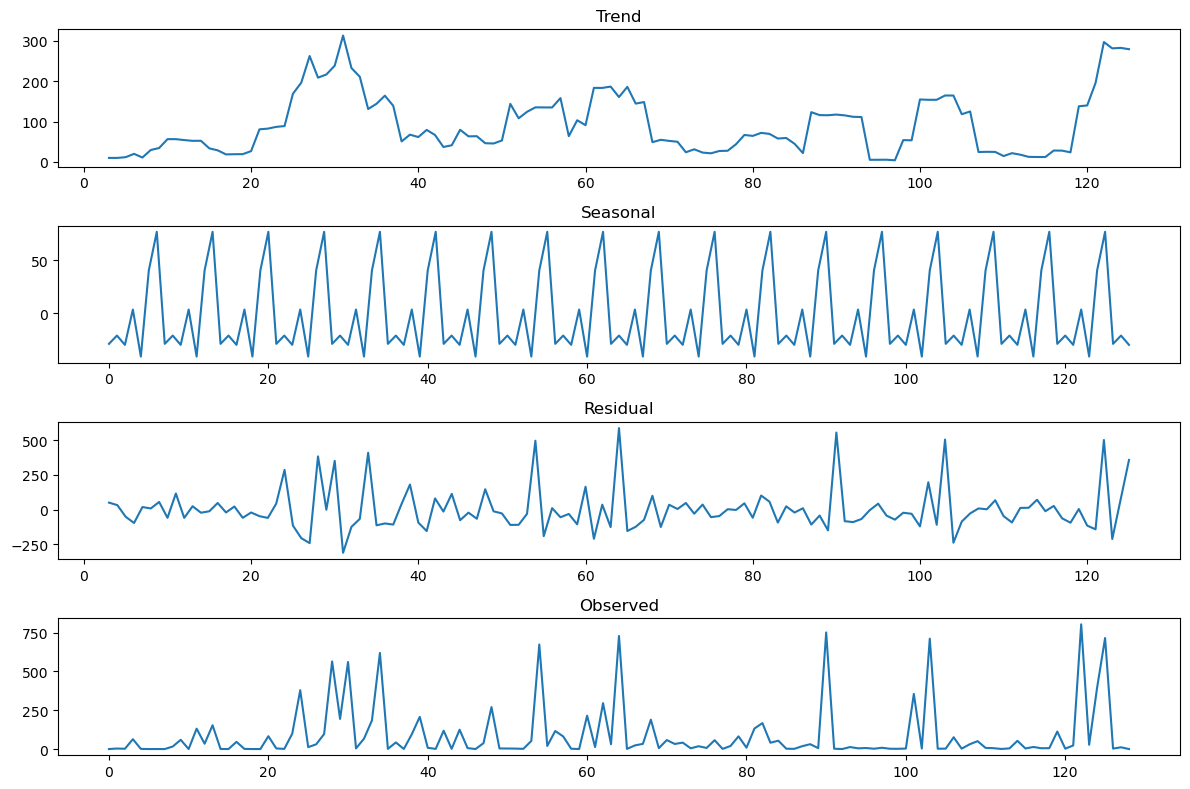

In [21]:
# Assuming data is indexed with datetime
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Spend'], model='additive', period=7)
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.tight_layout()
plt.show()



In [22]:
# Perform seasonal decomposition for each exchange
exchange_seasonal_patterns = {}

for exchange in data['Exchange Name'].unique():
    exchange_data = data[data['Exchange Name'] == exchange]
    result_exchange = seasonal_decompose(exchange_data['Spend'], model='additive', period=7)  # Assuming weekly seasonality
    exchange_seasonal_patterns[exchange] = result_exchange.seasonal

# Plot seasonal patterns for each exchange
plt.figure(figsize=(12, 8))
for exchange, seasonal_pattern in exchange_seasonal_patterns.items():
    plt.plot(seasonal_pattern, label=exchange)
plt.title('Seasonal Patterns by Exchange')
plt.xlabel('Day')
plt.ylabel('Seasonal Component')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: x must have 2 complete cycles requires 14 observations. x only has 7 observation(s)

Insufficient Data: The error suggests that some exchanges have a limited number of data points (only 7 observations) available for analysis.
Seasonal Decomposition: The seasonal decomposition method requires enough data points to identify recurring seasonal patterns accurately. Without sufficient data, it becomes challenging to separate the trend, seasonality, and residual components effectively.

In [23]:
missing_values_exchange_9 = data[data['Exchange Name'] == 'Exchange_9']['Spend'].isnull().sum()
print("Missing Values for Exchange 9:")
print(missing_values_exchange_9)

# Check the number of data points available for Exchange 9
data_points_exchange_9 = data[data['Exchange Name'] == 'Exchange_9']['Spend'].count()
print("Number of Data Points for Exchange 9:")
print(data_points_exchange_9)

Missing Values for Exchange 9:
0
Number of Data Points for Exchange 9:
1


The result shows that there are no missing values for Exchange 9 in the 'Spend' column, and there is only one data point available for Exchange 9.
Since there is only one data point available for Exchange 9, the standard deviation cannot be calculated because there is no variability in the data (standard deviation is calculated based on the variability of data points from the mean). When there is only one data point, the standard deviation is undefined (resulting in NaN).

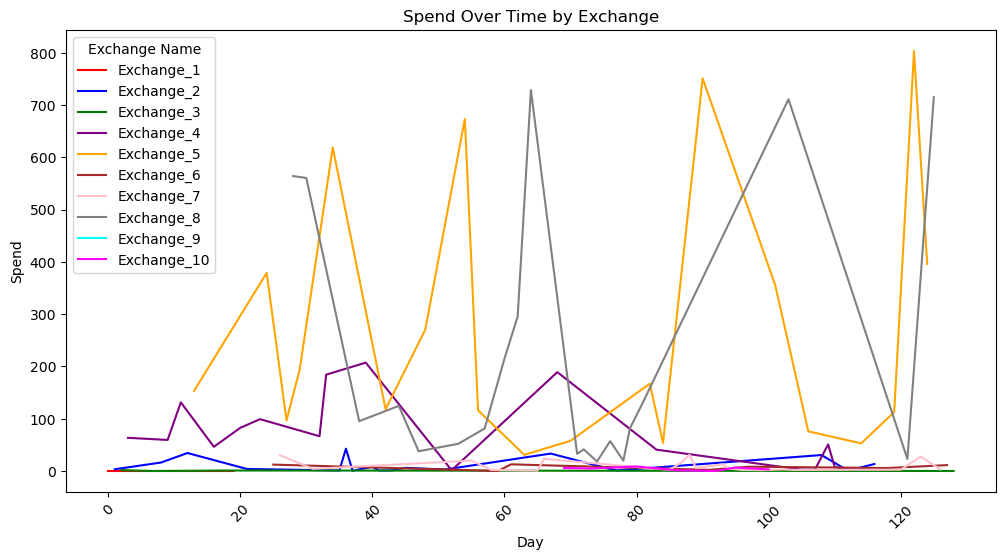

In [24]:
# Define a dictionary with color names for each Exchange Name
color_names = {
    'Exchange_1': 'red',
    'Exchange_2': 'blue',
    'Exchange_3': 'green',
    'Exchange_4': 'purple',
    'Exchange_5': 'orange',
    'Exchange_6': 'brown',
    'Exchange_7': 'pink',
    'Exchange_8': 'gray',
    'Exchange_9': 'cyan',
    'Exchange_10': 'magenta',
}

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='Spend', hue='Exchange Name', data=data, palette=color_names)
plt.title('Spend Over Time by Exchange')
plt.xlabel('Day')
plt.ylabel('Spend')
plt.xticks(rotation=45)
plt.show()


The line plot of "Spend Over Time by Exchange" provides valuable insights into the spending patterns across different exchanges over the duration of the data (128 days). Each line represents a different exchange, and the y-axis represents the total spend on that exchange.

**Key Observations:**
1. **Exchange_5:** The exchange represented by the orange line (Exchange_5) consistently shows the highest spending throughout the entire period. This indicates that Exchange_5 is one of the major contributors to the overall advertising spend.

2. **Exchange_8:** The exchange represented by the gray line (Exchange_8) shows significant spending in certain periods, but there are also several periods where the spend is relatively low. This suggests that Exchange_8 might have varying performance over time, and further investigation is needed to identify the reasons for these fluctuations.

3. **Other Exchanges:** The remaining exchanges (Exchange_1 to Exchange_10) exhibit relatively lower spending compared to Exchange_5 and Exchange_8. Some exchanges show stable spending patterns over time, while others display sporadic fluctuations.

**Conclusions:**
1. The spending distribution varies across different exchanges, and Exchange_5 stands out as the highest spender.
2. Understanding the performance and return on investment (ROI) of each exchange is crucial to optimize the budget allocation and ensure effective utilization of resources and for ROI we need Revenue for each Exchange which is absent.

In summary, this analysis can serve as a starting point for further investigation into advertising strategies, budget allocation, and performance optimization on different exchanges to achieve better results and return on investment.

# The click-through rate (CTR) is a metric that represents the percentage of impressions that result in clicks. CTR is calculated as (Clicks / Impressions) * 100.

In [25]:
clicks_by_campaign = data.groupby('Campaign Name')['Clicks'].sum()
impressions_by_campaign = data.groupby('Campaign Name')['Impressions'].sum()

# Step 2: Calculate the CTR for each campaign
ctr_by_campaign = (clicks_by_campaign / impressions_by_campaign) * 100

# Step 3: Print or display the CTR for each campaign
print("CTR by Campaign:")
print(ctr_by_campaign)

CTR by Campaign:
Campaign Name
Campaign_A    8.330227
Campaign_B    8.524279
Campaign_C    8.846119
dtype: float64


Based on the CTR values, all three campaigns (Campaign_A, Campaign_B, and Campaign_C) seem to have relatively similar performance in terms of click-through rates, with Campaign_C having the highest CTR among them.

# Conversion Rate: The percentage of users who complete a specific action or goal, such as signing up, making a purchase, or completing a form. It helps measure the effectiveness of the campaigns in driving desired user actions. 

In [26]:
# Step 1: Calculate the total installs for each campaign
installs_by_campaign = data.groupby('Campaign Name')['Installs'].sum()

# Step 2: Calculate the Conversion Rate for each campaign
conversion_rate_by_campaign = (installs_by_campaign / impressions_by_campaign) * 100

# Step 3: Print or display the Conversion Rate for each campaign
print("Conversion Rate by Campaign:")
print(conversion_rate_by_campaign)

Conversion Rate by Campaign:
Campaign Name
Campaign_A    0.116802
Campaign_B    0.142467
Campaign_C    0.088180
dtype: float64


A higher conversion rate indicates that the campaign is more successful in attracting users to install the app, while a lower conversion rate may suggest that the campaign needs optimization to improve its performance.

# Click-Through Rate by Exchange

In [27]:
# Step 1: Calculate the Click-Through Rate (CTR) for each exchange
ctr_by_exchange = (data.groupby('Exchange Name')['Clicks'].sum() / data.groupby('Exchange Name')['Impressions'].sum()) * 100

# Step 2: Print or display the CTR for each exchange
print("Click-Through Rate (CTR) by Exchange:")
print(ctr_by_exchange)

Click-Through Rate (CTR) by Exchange:
Exchange Name
Exchange_1           NaN
Exchange_10     1.205424
Exchange_2      1.775457
Exchange_3      3.058104
Exchange_4      6.211544
Exchange_5      2.826707
Exchange_6      4.253545
Exchange_7     18.329177
Exchange_8     20.049118
Exchange_9           NaN
dtype: float64


The analysis calculates the CTR for each ad exchange, showing the engagement level of users on each platform. However, it also highlights that for Exchange_1 there is 0 clicks or for Exchange_9 there is only one data point, leading to missing data for CTR calculation. It emphasizes the importance of having sufficient data for accurate analysis and decision-making.`

# Any other insights from the data that would help in scaling Temple Crush installs?

Temporal Analysis: Understanding Day-to-Day Variations in Campaign Performance

In this section, we explore the temporal aspects of the data, particularly focusing on the relationship between date and campaign performance metrics. By converting the date to the day number or day of the year, we gain valuable insights into how key metrics vary over time, allowing us to identify patterns, trends, and potential opportunities for campaign optimization.

In [28]:
# data['Day'] = pd.to_datetime(data['Day'])
# Extract day of the week from the 'Date' column and map it to the corresponding day
data['DayOfWeek'] = data['Day'].dt.strftime('%A')
data


,Day,Campaign Name,Exchange Name,Bids,Wins,Impressions,Clicks,Installs,Spend,D7_Retained_Users,Cost_Per_Install,DayOfWeek
0,2020-07-28,Campaign_A,Exchange_1,0,0,0,0,0,0.00,0,0.000000,Tuesday
1,2020-07-22,Campaign_B,Exchange_2,2728,374,264,22,0,3.32,0,0.000000,Wednesday
2,2020-07-26,Campaign_A,Exchange_3,33165,1782,1804,11,0,1.75,0,0.000000,Sunday
3,2020-07-26,Campaign_A,Exchange_4,1487739,14388,6204,418,0,63.47,0,0.000000,Sunday
4,2020-07-25,Campaign_A,Exchange_3,29557,792,858,22,0,0.89,0,0.000000,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020-07-23,Campaign_A,Exchange_5,7499470,49225,49082,1309,77,396.00,11,5.142857,Thursday
125,2020-07-27,Campaign_C,Exchange_8,161931,130889,57706,12122,88,714.93,29,8.124205,Monday
126,2020-07-26,Campaign_B,Exchange_7,881969,836,836,110,0,2.97,0,0.000000,Sunday
127,2020-07-22,Campaign_A,Exchange_6,216887,4422,3916,198,0,11.27,0,0.000000,Wednesday


In [30]:
# Create a list of all the days of the week
pd.set_option('display.max_rows', None)
all_days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Merge the result after grouping with the list of all days to include all days in the final result
impressions_by_day_exchange = data.groupby(['DayOfWeek', 'Exchange Name'])['Impressions'].mean().reindex(pd.MultiIndex.from_product([all_days_of_week, data['Exchange Name'].unique()], names=['DayOfWeek', 'Exchange Name']), fill_value=0)
print(impressions_by_day_exchange)

DayOfWeek  Exchange Name
Monday     Exchange_1           0.000000
           Exchange_2        1254.000000
           Exchange_3           0.000000
           Exchange_4       10039.333333
           Exchange_5       43637.000000
           Exchange_6        1859.000000
           Exchange_7        2002.000000
           Exchange_8       27811.666667
           Exchange_9           0.000000
           Exchange_10       1078.000000
Tuesday    Exchange_1           0.000000
           Exchange_2         685.666667
           Exchange_3           0.000000
           Exchange_4        7428.666667
           Exchange_5       26488.000000
           Exchange_6           0.000000
           Exchange_7        1279.666667
           Exchange_8       19356.333333
           Exchange_9           0.000000
           Exchange_10         11.000000
Wednesday  Exchange_1           0.000000
           Exchange_2         341.000000
           Exchange_3         330.000000
           Exchange_4        662

1.Exchange_5 Dominates Impressions: Exchange_5 consistently has the highest average impressions across all days of the week. This indicates that Exchange_5 is the most active and dominant exchange in terms of impressions. Advertisers targeting Exchange_5 can expect their ads to receive high visibility and exposure.

2.Potential Issue with Exchange_9: Exchange_9 has zero impressions on all days of the week.Since there is only one data point available for Exchange 9 we found above.

3.Varying Performance on Different Days: The average impressions for other exchanges (e.g., Exchange_4, Exchange_8) show fluctuations on different days of the week. This variation may be due to specific ad campaigns, targeting strategies, or user behavior patterns on different days.

4.Potential Opportunities: Advertisers targeting Exchange_5 may find it to be a lucrative option, given its consistently high impressions. On the other hand, Exchange_9's lack of impressions may prompt advertisers to investigate and take corrective actions if it's a valuable exchange for their advertising goals.

Overall, the analysis of average impressions by exchange and day of the week provides valuable insights into the performance of different exchanges. Advertisers can use this information to optimize their ad strategies, allocate budgets effectively, and make data-driven decisions to improve campaign performance.

In [31]:
clicks_by_day_exchange=data.groupby(['DayOfWeek', 'Exchange Name'])['Clicks'].mean().reindex(pd.MultiIndex.from_product([all_days_of_week, data['Exchange Name'].unique()], names=['DayOfWeek', 'Exchange Name']), fill_value=0)

print(clicks_by_day_exchange)

DayOfWeek  Exchange Name
Monday     Exchange_1          0.000000
           Exchange_2         44.000000
           Exchange_3          0.000000
           Exchange_4        630.666667
           Exchange_5       1338.333333
           Exchange_6         99.000000
           Exchange_7        344.666667
           Exchange_8       5727.333333
           Exchange_9          0.000000
           Exchange_10         0.000000
Tuesday    Exchange_1          0.000000
           Exchange_2          7.333333
           Exchange_3          0.000000
           Exchange_4        432.666667
           Exchange_5        722.333333
           Exchange_6          0.000000
           Exchange_7        216.333333
           Exchange_8       3912.333333
           Exchange_9          0.000000
           Exchange_10         0.000000
Wednesday  Exchange_1          0.000000
           Exchange_2         11.000000
           Exchange_3         22.000000
           Exchange_4        352.000000
           Exch

Based on the data, let's analyze the average number of clicks for each exchange on different days of the week:

1. Monday:
   - Exchange_8 had the highest average clicks with approximately 5727 clicks.
   - Exchange_5 and Exchange_4 also performed well with around 1338 and 630 clicks, respectively.
   - Most exchanges had low to no clicks on Mondays.

2. Tuesday:
   - Exchange_8 showed the highest average clicks with approximately 3912 clicks.
   - Exchange_5 and Exchange_4 had around 722 and 432 clicks, respectively.
   - Other exchanges had relatively low clicks on Tuesdays.

3. Wednesday:
   - Exchange_8 maintained the lead with an average of around 3982 clicks.
   - Exchange_5 and Exchange_4 followed with approximately 863 and 352 clicks, respectively.
   - Exchanges 2 and 7 also had relatively higher average clicks on Wednesdays.

4. Thursday:
   - Exchange_8 again had the highest average clicks with around 2277 clicks.
   - Exchange_5 and Exchange_4 had approximately 616 and 374 clicks, respectively.
   - Most exchanges had moderate clicks on Thursdays.

5. Friday:
   - Exchange_8 continued to perform well with approximately 4411 clicks.
   - Exchange_5 and Exchange_4 had around 1371 and 487 clicks, respectively.
   - Other exchanges generally had low clicks on Fridays.

6. Saturday:
   - Exchange_8 stood out with an average of around 5602 clicks.
   - Exchange_5 and Exchange_4 followed with approximately 1503 and 418 clicks, respectively.
   - Other exchanges had relatively lower average clicks on Saturdays.

7. Sunday:
   - Exchange_8 had the highest average clicks with around 5049 clicks.
   - Exchange_5 and Exchange_4 had approximately 1287 and 531 clicks, respectively.
   - Most exchanges had low to moderate clicks on Sundays.

In conclusion, Exchange_8 consistently showed the highest average clicks across most days of the week. Exchanges 5 and 4 also had relatively good performance. It's important to note that the performance of each exchange can vary significantly depending on the day of the week. By identifying the days with higher engagement, advertisers can optimize their campaigns accordingly for better results.

In [32]:
installs_by_day_exchange=data.groupby(['DayOfWeek', 'Exchange Name'])['Installs'].mean().reindex(pd.MultiIndex.from_product([all_days_of_week, data['Exchange Name'].unique()], names=['DayOfWeek', 'Exchange Name']), fill_value=0)

print(installs_by_day_exchange)

DayOfWeek  Exchange Name
Monday     Exchange_1        0.000000
           Exchange_2        0.000000
           Exchange_3        0.000000
           Exchange_4       11.000000
           Exchange_5       33.000000
           Exchange_6        0.000000
           Exchange_7        7.333333
           Exchange_8       44.000000
           Exchange_9        0.000000
           Exchange_10       0.000000
Tuesday    Exchange_1        0.000000
           Exchange_2        0.000000
           Exchange_3        0.000000
           Exchange_4        7.333333
           Exchange_5        7.333333
           Exchange_6        0.000000
           Exchange_7        3.666667
           Exchange_8       47.666667
           Exchange_9        0.000000
           Exchange_10       0.000000
Wednesday  Exchange_1        0.000000
           Exchange_2        0.000000
           Exchange_3        0.000000
           Exchange_4       33.000000
           Exchange_5       55.000000
           Exchange_6    

Based on the data, let's analyze the number of installs for each exchange on different days of the week:

1. Monday:
   - Exchange_8 had the highest number of installs with 44 installs.
   - Exchange_5 and Exchange_4 also had a moderate number of installs with 33 and 11 installs, respectively.
   - Most exchanges had low to no installs on Mondays.

2. Tuesday:
   - Exchange_8 had the highest number of installs with 47.67 installs.
   - Exchange_5 and Exchange_4 had around 7.33 installs each.
   - Other exchanges had relatively low to no installs on Tuesdays.

3. Wednesday:
   - Exchange_4 had the highest number of installs with 33 installs.
   - Exchange_5 followed with 55 installs.
   - Exchange_8 had 11 installs on Wednesdays.
   - Most other exchanges had no installs on Wednesdays.

4. Thursday:
   - Exchange_5 had the highest number of installs with 29.33 installs.
   - Exchange_2 and Exchange_4 had around 3.67 and 7.33 installs, respectively.
   - Other exchanges had no installs on Thursdays.

5. Friday:
   - Exchange_5 had the highest number of installs with 33 installs.
   - Exchange_8 had 33 installs on Fridays.
   - Exchanges 6 and 7 also had a few installs with 22 and 3.67 installs, respectively.
   - Most other exchanges had no installs on Fridays.

6. Saturday:
   - Exchange_8 had the highest number of installs with 58.67 installs.
   - Exchange_4 had 14.67 installs on Saturdays.
   - Most other exchanges had no installs on Saturdays.

7. Sunday:
   - Exchange_8 had the highest number of installs with 25.67 installs.
   - Exchange_5 had 29.33 installs on Sundays.
   - Most other exchanges had no installs on Sundays.

In conclusion, Exchange_8 consistently showed the highest number of installs across most days of the week. Exchanges 5 and 4 also had some installations. However, there were several exchanges that had no installs on most days, indicating a lack of engagement or issues with the campaign performance. It is important for advertisers to closely monitor and optimize campaigns on different exchanges to improve engagement and drive more installs.

In [33]:
# Calculate the correlation between 'impressions_by_day_exchange', 'clicks_by_day_exchange', and 'installs_by_day_exchange'
correlation_matrix = pd.concat([impressions_by_day_exchange, clicks_by_day_exchange, installs_by_day_exchange], axis=1).corr()

# Display the correlation matrix
print(correlation_matrix)

             Impressions    Clicks  Installs
Impressions     1.000000  0.602082  0.785663
Clicks          0.602082  1.000000  0.740289
Installs        0.785663  0.740289  1.000000


Based on the correlation matrix between `Impressions`, `Clicks`, and `Installs`, we can draw the following conclusions:

1. **Impressions vs. Clicks:** The correlation coefficient between `Impressions` and `Clicks` is approximately 0.602, indicating a positive and moderate correlation between the two variables. This means that there is a tendency for higher impressions to be associated with higher click-through rates. However, the correlation is not very strong, suggesting that other factors may also influence the number of clicks.

2. **Impressions vs. Installs:** The correlation coefficient between `Impressions` and `Installs` is approximately 0.786, indicating a positive and relatively strong correlation between the two variables. This suggests that higher impressions are associated with higher app installations. Advertising efforts that result in more impressions are likely reaching a larger audience and driving more app installations.

3. **Clicks vs. Installs:** The correlation coefficient between `Clicks` and `Installs` is approximately 0.740, indicating a positive and strong correlation between the two variables. This means that higher click-through rates are associated with a higher number of app installations. Ads that attract more clicks are more likely to lead to app installations.

In summary, the correlation analysis suggests that both `Impressions` and `Clicks` have positive relationships with `Installs`. Higher impressions are associated with higher clicks, and higher clicks are associated with more app installations. This indicates that the advertising campaigns are effective in attracting user attention (impressions and clicks) and converting those clicks into app installations.

However, it's essential to keep in mind that correlation does not imply causation. While there is a relationship between these variables, other factors may also be influencing the outcomes. Further analysis, such as A/B testing, customer feedback, and user behavior analysis, can provide a deeper understanding of the effectiveness of the advertising campaigns and help optimize them for better results. Additionally, it's essential to monitor the campaigns continuously and adapt strategies based on real-time data and user feedback.

# Apart from the analysis we performed earlier, there are several other insights from the data that can help in scaling Temple Crush installs:

1. **Campaign Performance Analysis**: Analyze the performance of different campaigns based on metrics like total installs, average cost per install, and retention rates. Identify the top-performing campaigns and allocate more budget to them to scale installs.This one is completed above as we have ample data to perform this analysis.

2. **Geographic Targeting**: Analyze the performance of campaigns in different geographical regions. Identify regions with higher engagement and installs and focus more on those areas to maximize the reach and impact.

3. **Dayparting**: Analyze the performance of campaigns during different times of the day. Identify the peak hours when the engagement is higher and concentrate more on those time slots to reach a larger audience.

4. **Ad Creative Analysis**: Evaluate the performance of different ad creatives and identify the ones with higher click-through rates and conversion rates. Use the best-performing creatives for future campaigns to improve user engagement.

5. **Audience Targeting**: Refine audience targeting based on user demographics, interests, and behavior. Use data-driven insights to target the most relevant audience segments to increase the likelihood of installs.

6. **Landing Page Optimization**: Improve the landing page experience to ensure it aligns with the ad content and provides a seamless user experience. A well-optimized landing page can significantly improve conversion rates.

7. **In-App Engagement**: Focus on in-app engagement strategies to retain and convert users after they have installed the app. Implement personalized onboarding, push notifications, and incentives to keep users engaged and active.

8. **A/B Testing**: Continuously run A/B tests on different campaign elements, such as ad copy, visuals, targeting criteria, and call-to-action buttons, to identify the most effective combination.

9. **Competitor Analysis**: Monitor the performance of competitors' campaigns and learn from their successful strategies. Identify gaps in the market and leverage them to improve Temple Crush's installs.

10. **User Feedback and Reviews**: Pay attention to user feedback and app reviews to understand user pain points and areas of improvement. Addressing user concerns can lead to better ratings and more organic installs.

By implementing these insights and optimizing campaigns based on data-driven decisions, Temple Crush can effectively scale its installs and improve the overall success of its app. Continuous monitoring and analysis will be crucial to adapting to changing market dynamics and maintaining a competitive edge.

# Part 2: General
1. In general, what are the common reasons that you can think of for the following issues

i)Low Win Rate
ii)Low CTR

i)Low Win Rate in the context of advertising and marketing campaigns can be attributed to various factors. Some common reasons for a low win rate include:
1. **Ineffective Targeting**: Ineffective targeting may result in advertisements being shown to the incorrect people, resulting in low engagement and conversion rates. Understanding and adjusting your targeting criteria are crucial for raising your win rate.
2. **Weak Ad Creatives**: Ads that lack appealing graphics, intriguing content, or clear calls-to-action may fail to pique the audience's interest. It has been demonstrated that improving the quality and relevance of ad creatives increases the win rate.
3. **Uncompetitive Bids**: Low win rates in competitive advertising auctions can be caused by bidding too low. Ad placements can be won by increasing bid amounts or refining bidding strategies.
4. **Landing Page Issues**: Even if an ad generates clicks, a poorly optimized or confusing landing page can lead to high bounce rates and low conversions. It is vital that the landing page corresponds to the ad content and provides a nice user experience.
5. **Ad Placement**: Placing advertising in ineffective or irrelevant placements can result in a low success rate. Identifying and concentrating on high-performing placements contributes to a rise in overall victory rate.
6. **Ad Frequency**: Constantly bombarding users with the same ad may result in ad fatigue and lower engagement. Ad frequency and rotation control can aid in retaining user attention and increasing win rates.
7. **rivalry**: In the advertising industry, fierce rivalry might contribute to a low win rate. Understanding the competitive landscape and seeking for opportunities in less congested areas may be beneficial.
8. **Ad Fatigue**: Ads that run indefinitely without being refreshed or updated can lose their effectiveness over time. Ad fatigue can be mitigated by refreshing ad creatives and content on a frequent basis.
9. **Inadequate Optimization**: If programs are not monitored and optimized, opportunities for improvement may be overlooked. Continuous tracking and data analysis are essential to make informed decisions and increase the win rate.
10. **Misaligned Messaging**: If the messaging in the ad does not resonate with the target audience or is not relevant to their needs and interests, it may lead to low engagement and conversions.

To address a low win rate, advertisers and marketers need to carefully analyze campaign data, experiment with different strategies, and make data-driven adjustments to improve overall performance. Regular monitoring, testing, and optimization are key to achieving a higher win rate and maximizing the return on advertising investment.

ii)Several common reasons for low Click-Through Rate (CTR) in digital marketing campaigns include:

1. **Irrelevant Ad Content**: If the ad content is not relevant to the target audience or does not align with their interests and needs, users are less likely to click on it.

2. **Poor Ad Placement**: Ad placement plays a crucial role in CTR. If the ad is placed in an obscure or less visible location on the webpage, it may not attract user attention.

3. **Ad Fatigue**: When users are repeatedly exposed to the same ad, they may become disinterested, leading to lower CTR over time.

4. **Lack of Call-to-Action (CTA)**: A clear and compelling CTA encourages users to take the desired action. If the ad lacks a strong CTA, users may not feel motivated to click on it.

5. **Slow Loading Time**: If the ad takes too long to load, users may lose patience and abandon the page before the ad appears, resulting in a lower CTR.

6. **Targeting Issues**: Poor audience targeting can lead to irrelevant ads being shown to users who have little interest in the product or service, resulting in low CTR.

7. **Ad Relevance to Landing Page**: If the landing page does not match the promise or content of the ad, users may feel misled, leading to a low CTR.

8. **High Ad Frequency**: Overexposure to the same ad can lead to banner blindness, causing users to ignore the ad and resulting in a lower CTR.

9. **Competitive Landscape**: If competitors are running more engaging or eye-catching ads, it may reduce the CTR of other ads in the same space.

10. **Seasonal Factors**: CTR can fluctuate based on the time of the year or specific events. Some seasons may have higher engagement rates than others.

To improve CTR, advertisers should focus on creating relevant and compelling ad content, optimize ad placement, implement effective CTAs, ensure fast loading times, and refine audience targeting to reach the right users with the right message at the right time. Regular testing and monitoring of ad performance can help identify areas for improvement and drive higher CTR.

# 2. What’s your take on ATT? Do you think it’s a good step forward for the industry/users?

The introduction of ATT stressed user privacy and data protection, harmonizing with the industry's rising worries about user data misuse. This transition necessitates an emphasis on increasing ATT opt-in rates, since higher opt-in rates provide greater visibility into user behavior and allow strategic decision-making, such as conversion value mapping and predictive analytics.

ATT has had a tremendous impact, driving the industry to reconsider measurement and attribution practices on iOS. It was the first step toward more user privacy, and Android followed suit with comparable protections in Android 12. Despite the hurdles, the industry is evolving and discovering new ways to efficiently scale campaigns on iOS by leveraging Apple's SKAdNetwork (SKAN) for app install and reinstall attribution.

Overall, ATT is a significant move forward for the industry and users since it prioritizes user privacy and encourages people to make informed data decisions. While it poses obstacles, it also creates new opportunity for app developers and marketers to build trust, improve user experiences, and ethically exploit data for successful campaigns.